In [51]:
print("Name: Pooja P Rawool")
print("ERP ID: 1132200081")

Name: Pooja P Rawool
ERP ID: 1132200081


In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split

In [2]:
%cd D:\MSC\Trimester3\ML2\Datasets

D:\MSC\Trimester3\ML2\Datasets


# HTRU_2

In [3]:
data=pd.read_csv('HTRU_2.csv',header=None,names=['Profile_mean','Profile_stdev','Profile_skewness','Profile_kurtosis','DM_mean','DM_stdev','DM_skewness','DM_kurtosis','class'])

In [4]:
data.head()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
data.shape

(17898, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Profile_mean      17898 non-null  float64
 1   Profile_stdev     17898 non-null  float64
 2   Profile_skewness  17898 non-null  float64
 3   Profile_kurtosis  17898 non-null  float64
 4   DM_mean           17898 non-null  float64
 5   DM_stdev          17898 non-null  float64
 6   DM_skewness       17898 non-null  float64
 7   DM_kurtosis       17898 non-null  float64
 8   class             17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [7]:
data.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


Looking at the order of magnitude scaling needs to be done

In [8]:
data.isnull().sum()

Profile_mean        0
Profile_stdev       0
Profile_skewness    0
Profile_kurtosis    0
DM_mean             0
DM_stdev            0
DM_skewness         0
DM_kurtosis         0
class               0
dtype: int64

No null values are present in the dataset

In [9]:
data["class"].value_counts()

0    16259
1     1639
Name: class, dtype: int64

There is a class imbalance assuming that it is a natural class balance.

array([[<AxesSubplot:title={'center':'Profile_mean'}>,
        <AxesSubplot:title={'center':'Profile_stdev'}>,
        <AxesSubplot:title={'center':'Profile_skewness'}>],
       [<AxesSubplot:title={'center':'Profile_kurtosis'}>,
        <AxesSubplot:title={'center':'DM_mean'}>,
        <AxesSubplot:title={'center':'DM_stdev'}>],
       [<AxesSubplot:title={'center':'DM_skewness'}>,
        <AxesSubplot:title={'center':'DM_kurtosis'}>,
        <AxesSubplot:title={'center':'class'}>]], dtype=object)

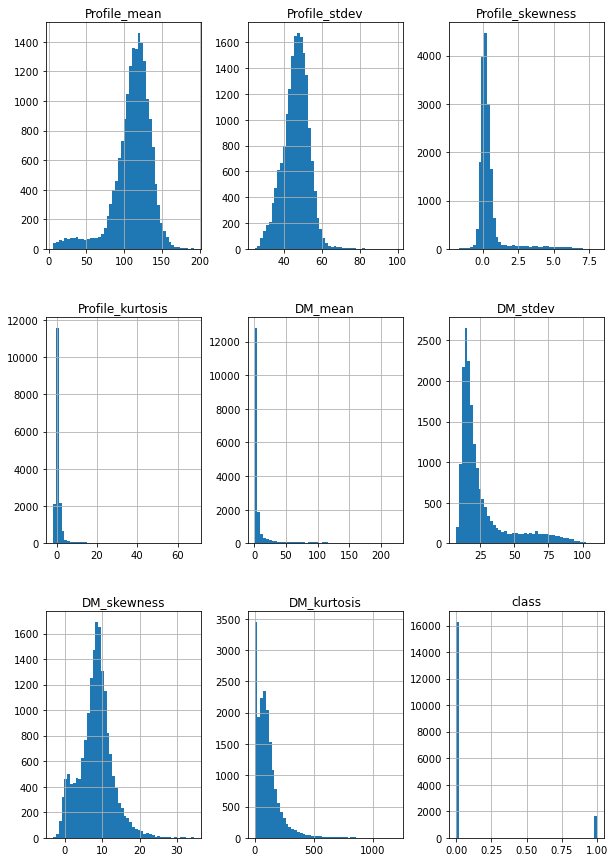

In [10]:
data.hist(bins=50,figsize=(10,15))

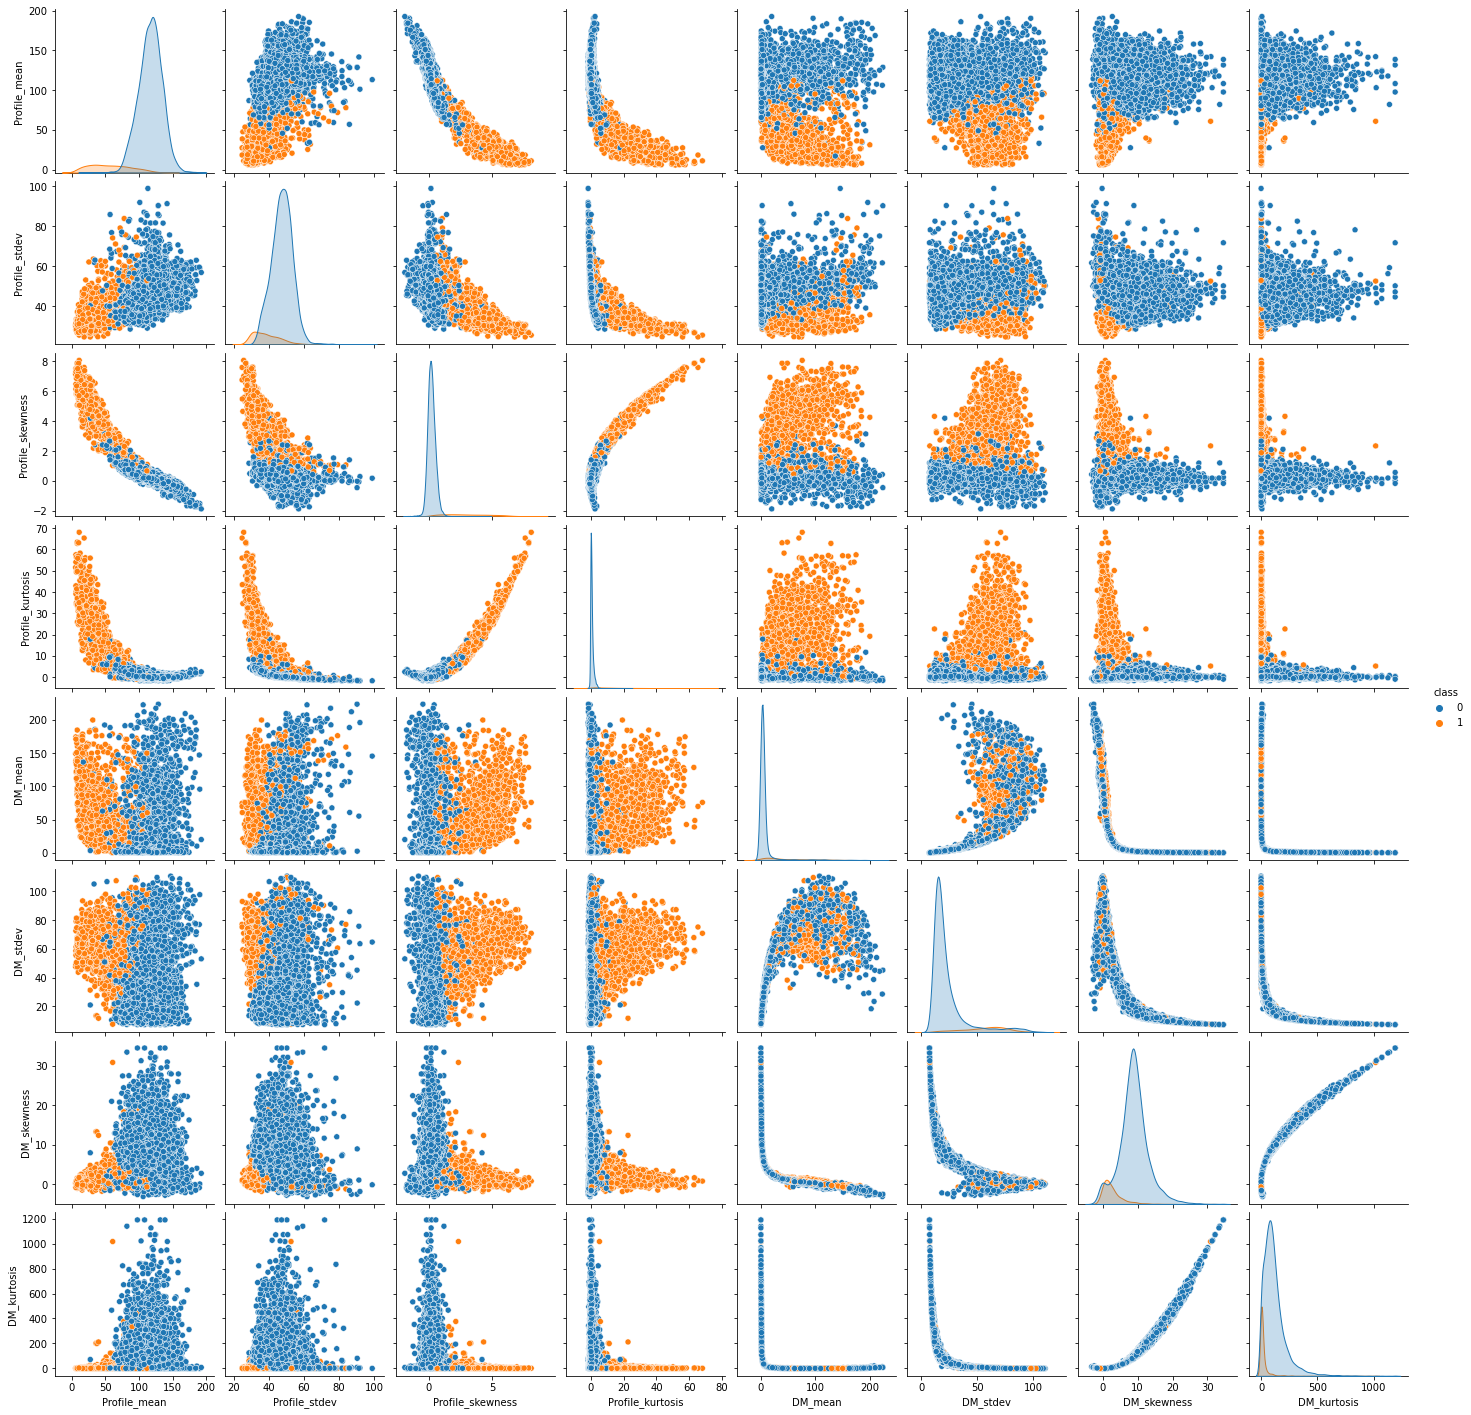

In [13]:
import seaborn as sns
sns.pairplot(data,hue="class")

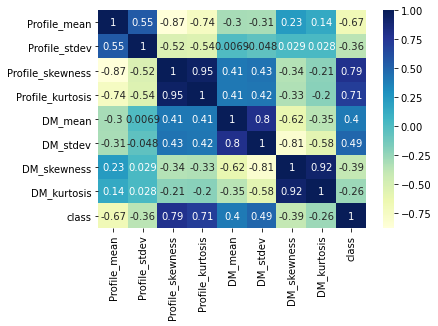

In [14]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu');

In [11]:
y=data["class"]
x=data.drop(["class"],axis=1)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [13]:
x_train.shape,y_train.shape

((14318, 8), (14318,))

In [14]:
x_test.shape,y_test.shape

((3580, 8), (3580,))

# With all the attributes

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3289   17]
 [  43  231]]


In [19]:
model.score(x_train,y_train)

0.9779298784746473

In [20]:
model.score(x_test,y_test)

0.9832402234636871

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.89       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580

[[3289   17]
 [  43  231]]


# PCA

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
p=pca.fit_transform(x_train)

In [23]:
p.shape

(14318, 3)

In [24]:
p

array([[ 2.37540010e-01, -1.09299783e+00, -6.13860761e-01],
       [-6.03090569e-01, -2.16922916e-01, -3.34393061e-01],
       [ 3.48794138e+00, -2.16703352e+00,  1.64935184e+00],
       ...,
       [-1.88799379e+00, -1.85349737e-01,  7.47700522e-01],
       [-6.02077236e-01,  4.01307475e-01,  3.32935299e-03],
       [ 6.62019546e-02,  1.99913481e-01, -8.78358572e-01]])

In [25]:
pca.components_

array([[-0.3604762 , -0.21423106,  0.41532113,  0.40059019,  0.34434512,
         0.38604057, -0.3708261 , -0.29340235],
       [-0.36032143, -0.43126165,  0.31861511,  0.30647844, -0.25212685,
        -0.31747653,  0.40959284,  0.39574189],
       [-0.01511215,  0.43449813,  0.09478574,  0.08642309,  0.5691621 ,
         0.23374606,  0.27257921,  0.58450625]])

pca.components_ represents principal axis. So every point in the original dataset is transformed by using projections on all these 3 axis.

In [26]:
pca.explained_variance_ratio_

array([0.51974894, 0.26659765, 0.10071121])

51+26+10 = 87% which means I am loosing 13% of the variance. To reduce the loss of information we can try increasing the no of components

<Figure size 432x288 with 0 Axes>

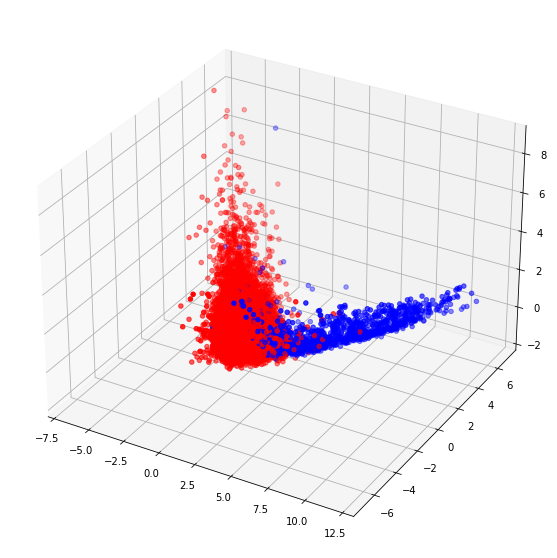

In [27]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
plt.figure(figsize=(20,10))
ax=plt.axes(projection="3d")
x=p[:,0]
y=p[:,1]
z=p[:,2]
colors={0:'red',1:'blue'}
ax.scatter3D(x,y,z,c=y_train.apply(lambda x: colors[x]))

In [28]:
q=pca.transform(x_test)

In [29]:
q

array([[-0.552274  ,  0.4607813 , -0.29346207],
       [-0.69377751, -0.6151136 , -0.18692645],
       [-0.8215158 , -0.5767695 ,  0.42197296],
       ...,
       [-0.32260748,  0.03226502, -0.36814921],
       [-0.23834062, -1.53998708, -0.67356995],
       [-0.60732654,  0.10426826, -0.5547805 ]])

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(p, y_train)

LogisticRegression(random_state=0)

In [31]:
y_pred = model.predict(q)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3288   18]
 [  63  211]]


In [33]:
model.score(p,y_train)

0.9702472412348093

In [34]:
model.score(q,y_test)

0.9773743016759776

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3306
           1       0.92      0.77      0.84       274

    accuracy                           0.98      3580
   macro avg       0.95      0.88      0.91      3580
weighted avg       0.98      0.98      0.98      3580

[[3288   18]
 [  63  211]]


Accuracy decreased by 1% which means it is a significant accuracy which i could get along the 3 principal components